# 🛒 Retail Sales Analysis
This notebook explores the **Online Retail dataset**, performing exploratory data analysis (EDA) to uncover insights into revenue trends, customer behavior, and product performance.

### Objectives:
- Understand the dataset structure
- Clean and prepare the data
- Perform EDA (revenue trends, top customers, top products, countries)
- Generate business insights

## 1. Data Understanding
Let's load the dataset and explore its structure.

In [3]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#reading the data
df = pd.read_excel( "/data/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# 
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [7]:
# checking for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.isnull().mean()*100 # percentage of missing values

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [5]:
# sum of  duplicates
df.duplicated().sum()

5268

## 2. Data Cleaning
We'll clean duplicates, handle missing values, and create a new `Revenue` column.

In [6]:
# reasigning the data to new dataframe to remove dupicates
df1 = df.drop_duplicates()

In [7]:
# confimation of duplicates removed
df1.duplicated().sum()

0

In [8]:
# Remove rows where StockCode is 'D' or 'POST' (which are not real products)
df1 = df1[~df1['StockCode'].isin(['D', 'POST'])]



In [9]:
# checking the data types
df1.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:

# grouping into countries  countries
df1.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

Country
United Kingdom          11374
Germany                   227
EIRE                      186
France                    181
Spain                      55
Belgium                    52
Netherlands                46
Switzerland                34
Portugal                   31
Finland                    30
Australia                  27
Italy                      21
Norway                     17
Cyprus                     14
Channel Islands            14
Poland                     13
Denmark                    11
Sweden                     11
Austria                    11
Malta                       7
Unspecified                 7
Iceland                     7
Japan                       6
USA                         6
Hong Kong                   5
Singapore                   4
Israel                      4
Greece                      3
Czech Republic              3
Canada                      3
Bahrain                     3
Lithuania                   2
Lebanon                     1
Eu

In [10]:

df1['Country'].value_counts()

Country
United Kingdom          490082
Germany                   9097
France                    8230
EIRE                      8183
Spain                     2466
Netherlands               2331
Belgium                   1971
Switzerland               1961
Portugal                  1480
Australia                 1256
Norway                    1066
Italy                      784
Channel Islands            757
Finland                    654
Cyprus                     610
Unspecified                442
Sweden                     437
Austria                    387
Denmark                    375
Japan                      358
Poland                     336
Israel                     294
USA                        291
Hong Kong                  282
Singapore                  229
Iceland                    182
Canada                     150
Greece                     142
Malta                      123
United Arab Emirates        67
European Community          58
RSA                         58


## 3. Exploratory Data Analysis (EDA)



In [11]:
#  Check for ...
# Number of unique customers.

# Number of unique products.

# Total transactions.

df1.nunique()

InvoiceNo      25689
StockCode       4068
Description     4221
Quantity         721
InvoiceDate    23077
UnitPrice       1501
CustomerID      4372
Country           38
dtype: int64

####  This dataset represents a medium-sized online retailer with tens of thousands of transactions, thousands of products, and a diverse international customer base. The wide spread of quantities and prices, along with returns and missing customer IDs, makes it a realistic dataset for uncovering sales trends, customer behavior, and business opportunities.

## 3.1 Sales Overview

In [12]:
# checking for total revenue
total_revenue = round(df1['Quantity'] * df1['UnitPrice']).sum()
total_revenue

9660666.0

#### The company generated almost £10M in sales during the year, but how was this revenue distributed across time, products, and customers?

### 3.2 Revenue Trends by Month

In [13]:
# Revenue by month (time trend of revenue)
#Creating a new column for revenue
df1['Revenue'] =  (df1['Quantity'] * df1['UnitPrice']).round(2)
#extracting month from invoice date
df1['Month'] = df1['InvoiceDate'].dt.to_period('M')
# Grouping by month and summing revenue
monthly_revenue = df1.groupby("Month")["Revenue"].sum().reset_index()
print(monthly_revenue)


      Month     Revenue
0   2010-12   743031.59
1   2011-01   553489.65
2   2011-02   494269.46
3   2011-03   677102.18
4   2011-04   491111.08
5   2011-05   717277.34
6   2011-06   685364.93
7   2011-07   675191.76
8   2011-08   677264.50
9   2011-09  1012362.24
10  2011-10  1061887.53
11  2011-11  1447115.32
12  2011-12   430004.95


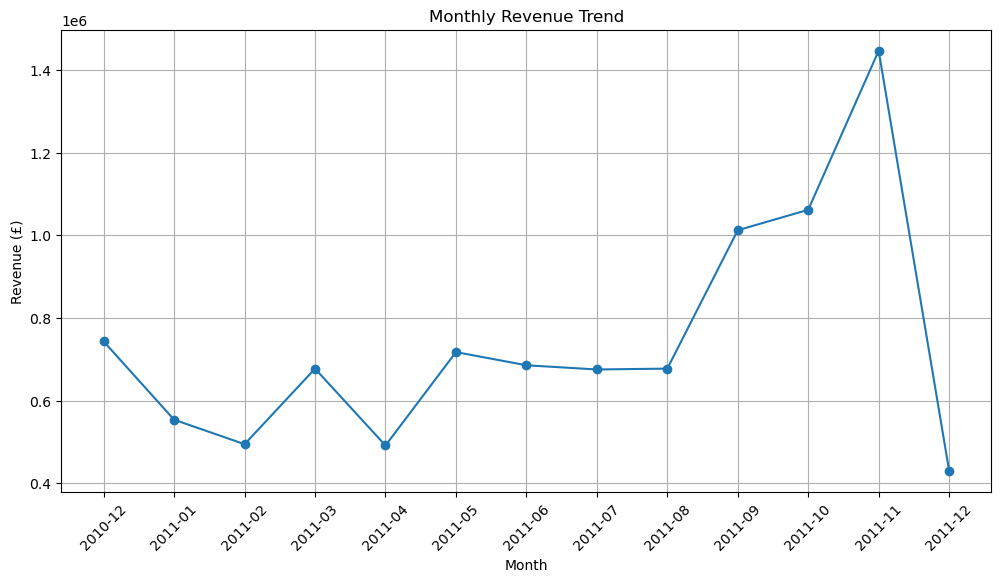

In [14]:
#visualizeing the monthly revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue["Month"].astype(str), monthly_revenue["Revenue"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.grid(True)
plt.show()


 📌 **Observation:** Revenue spikes around August, peaks strongly in November (likely holiday season), and dips in December.

### 3.3 Revenue by country (which countries contribute most revenue)

In [15]:
#Revenue by country (which countries contribute most revenue).
# Grouping by country and summing revenue
country_revenue = df1.groupby("Country")["Revenue"].sum().reset_index().sort_values(by="Revenue", ascending=False).head(10)
print(country_revenue)

           Country     Revenue
36  United Kingdom  8173565.73
24     Netherlands   283373.94
10            EIRE   263427.89
14         Germany   200688.47
13          France   182252.11
0        Australia   136922.50
33     Switzerland    52483.05
31           Spain    48904.03
3          Belgium    36662.96
20           Japan    35340.62


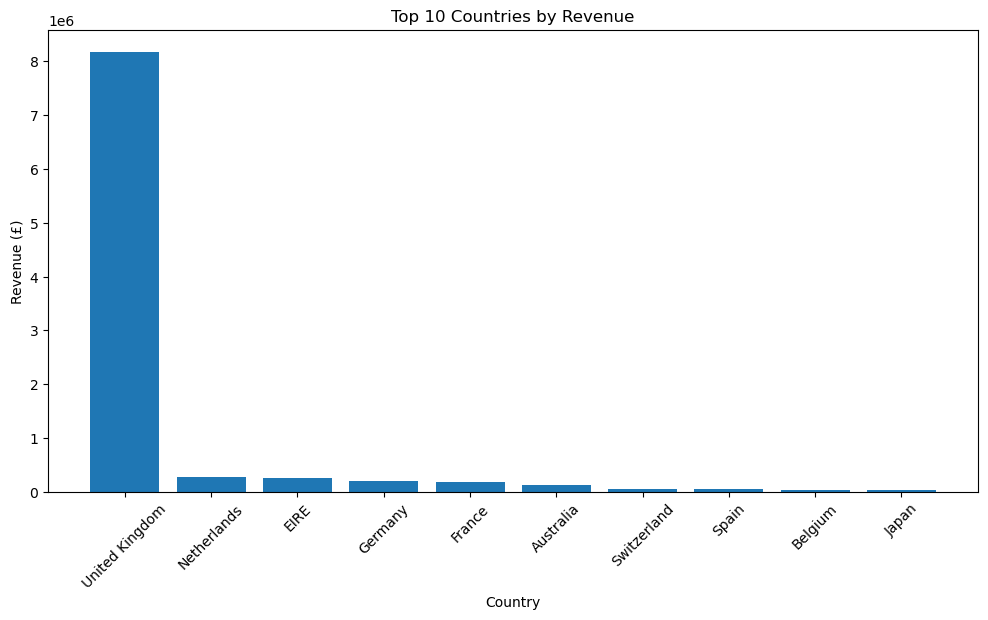

In [23]:
#visualizeing the top countries with revenue

plt.figure(figsize=(12,6))
plt.bar(country_revenue["Country"], country_revenue["Revenue"])
plt.xticks(rotation=45)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue (£)")
plt.show()


 📌 **Observation:** The UK dominates revenue, with significant contributions from a few other European countries.

### 3.4 Customer Analysis

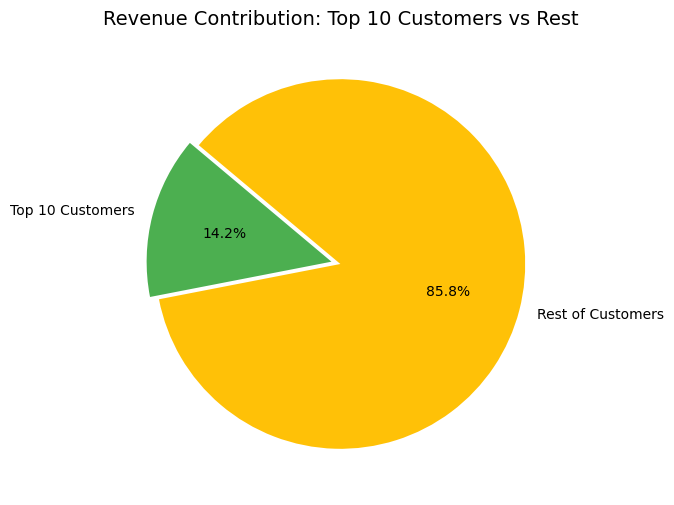

In [16]:
#Top 20 customers by total revenue.
top_customers = df1.groupby("CustomerID")["Revenue"].sum().reset_index().sort_values(by="Revenue", ascending=False).head(10)
top10_revenue = round(top_customers['Revenue'].sum())
total_revenue = round(df1['Revenue'].sum())
# Pie chart visualization
labels = ['Top 10 Customers', 'Rest of Customers']
values = [top10_revenue, total_revenue - top10_revenue]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['#4CAF50', '#FFC107'], explode=(0.05, 0))  # explode highlights Top 20

plt.title("Revenue Contribution: Top 10 Customers vs Rest", fontsize=14)
plt.show()

 📌 **Observation:** The top 20 customers contribute only about ~19% of total revenue, showing the business isn’t overly dependent on a few customers.

### 3.5 Product Analysis

In [25]:
# Top 10 products by total revenue.
top_products = df1.groupby("Description")["Revenue"].sum().reset_index().sort_values(by="Revenue", ascending=False).head(20)
print(top_products)

                             Description    Revenue
1098                      DOTCOM POSTAGE  206245.48
2913            REGENCY CAKESTAND 3 TIER  164459.49
3916  WHITE HANGING HEART T-LIGHT HOLDER   99612.42
2470                       PARTY BUNTING   98243.88
1865             JUMBO BAG RED RETROSPOT   92175.79
2801                  RABBIT NIGHT LIGHT   66661.63
2438     PAPER CHAIN KIT 50'S CHRISTMAS    63715.24
244        ASSORTED COLOUR BIRD ORNAMENT   58792.42
773                        CHILLI LIGHTS   53746.66
3522                      SPOTTY BUNTING   42030.67
1863             JUMBO BAG PINK POLKADOT   41584.43
414             BLACK RECORD COVER FRAME   40578.21
2520      PICNIC BASKET WICKER 60 PIECES   39619.50
3193   SET OF 3 CAKE TINS PANTRY DESIGN    37378.79
1078       DOORMAT KEEP CALM AND COME IN   36532.39
1832            JAM MAKING SET WITH JARS   36069.34
3966   WOOD BLACK BOARD ANT WHITE FINISH   35795.97
2053             LUNCH BAG RED RETROSPOT   34717.66
2739        

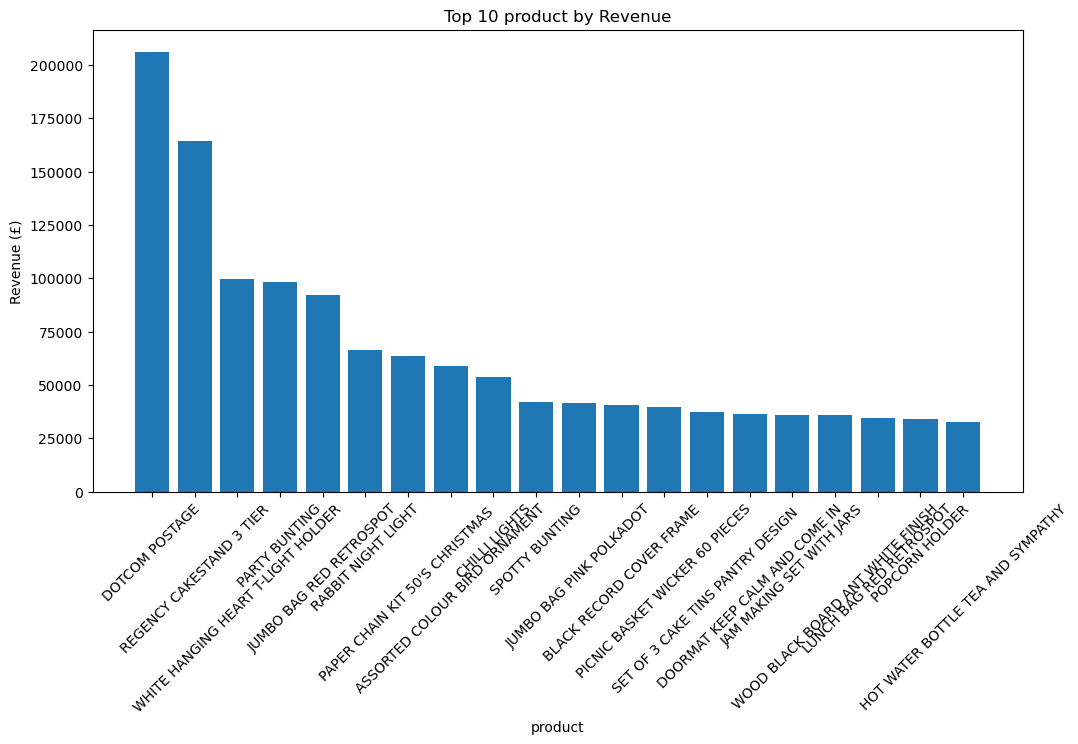

In [26]:
plt.figure(figsize=(12,6))
plt.bar(top_products["Description"], top_products["Revenue"])
plt.xticks(rotation=45)
plt.title("Top 10 product by Revenue")
plt.xlabel("product")
plt.ylabel("Revenue (£)")
plt.show()

 📌 **Observation:** A few products like *Dotcom Postage* and *Regency Cake Stand* drive a large share of sales revenue.

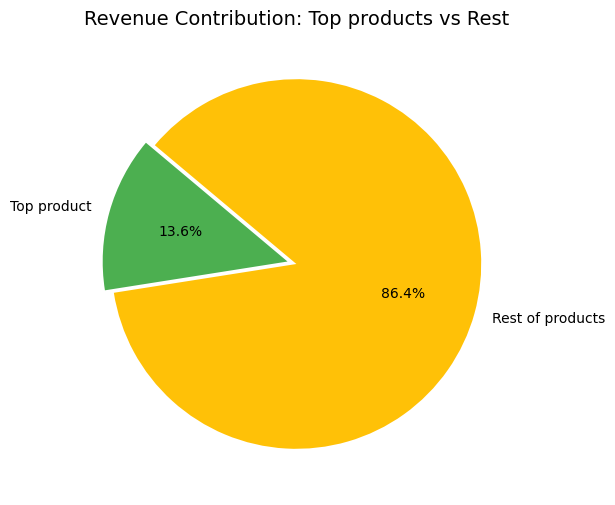

the top products contributed 13.6 % of the total revenue


In [27]:
 
top_products_revenue = round(top_products['Revenue'].sum())
total_product_revenue = round(df1['Revenue'].sum())
top_product_revenue_contributed = (top_products_revenue / total_product_revenue) * 100
# Pie chart visualization
labels = ['Top product', 'Rest of products']
values = [top_products_revenue, total_product_revenue - top_products_revenue]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=['#4CAF50', '#FFC107'], explode=(0.05, 0))  # explode highlights Top 20

plt.title("Revenue Contribution: Top products vs Rest", fontsize=14)
plt.show()
print(f'the top products contributed {round(top_product_revenue_contributed,1)} % of the total revenue')


In [28]:
# Top 10 products by total quatity sold.
top_quantity_products = df1.groupby("Description")["Quantity"].sum().reset_index().sort_values(by="Quantity", ascending=False).head(10)
print(top_quantity_products)

                             Description  Quantity
4007   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
1865             JUMBO BAG RED RETROSPOT     47260
2739                      POPCORN HOLDER     36322
244        ASSORTED COLOUR BIRD ORNAMENT     36282
2394     PACK OF 72 RETROSPOT CAKE CASES     36016
3916  WHITE HANGING HEART T-LIGHT HOLDER     35298
2801                  RABBIT NIGHT LIGHT     30631
2160             MINI PAINT SET VINTAGE      26437
2360          PACK OF 12 LONDON TISSUES      26299
2392  PACK OF 60 PINK PAISLEY CAKE CASES     24719


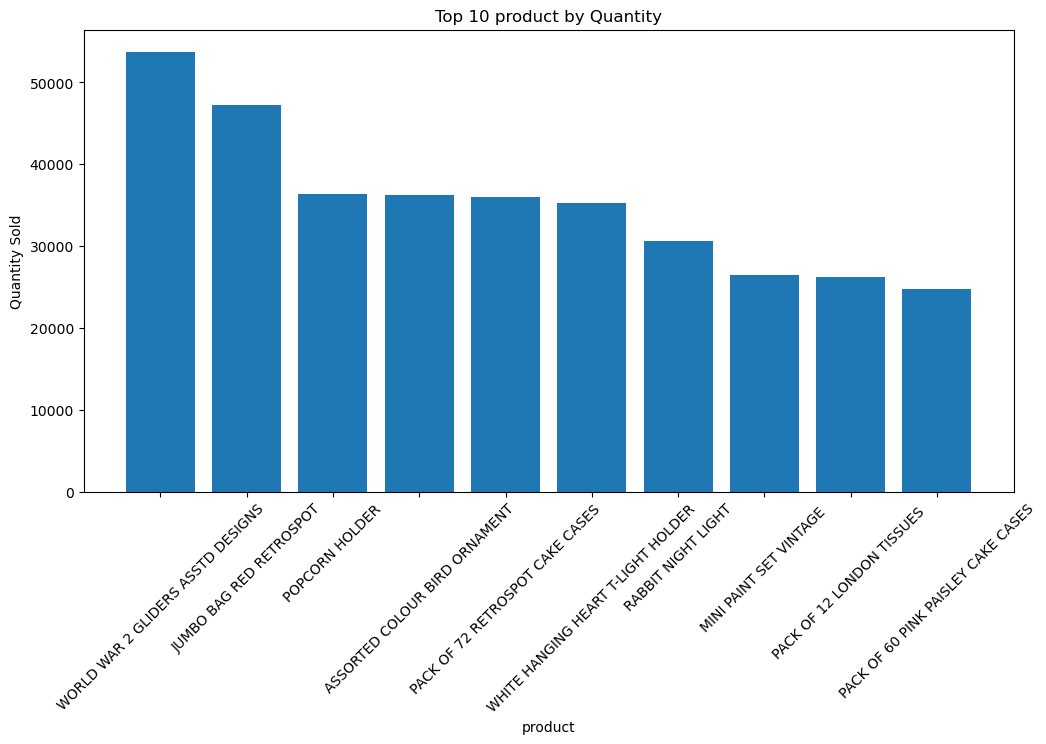

In [97]:
plt.figure(figsize=(12,6))
plt.bar(top_quantity_products["Description"], top_quantity_products["Quantity"])
plt.xticks(rotation=45)
plt.title("Top 10 product by Quantity")
plt.xlabel("product")
plt.ylabel("Quantity Sold")
plt.show()

 📌 **Observation:** High-volume products (like World War 2 Gliders, Jumbo Bags, Cake Cases) don’t always match the top revenue drivers, highlighting different sales dynamics.

### 3.6 Forcasting next six month revenue

c:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


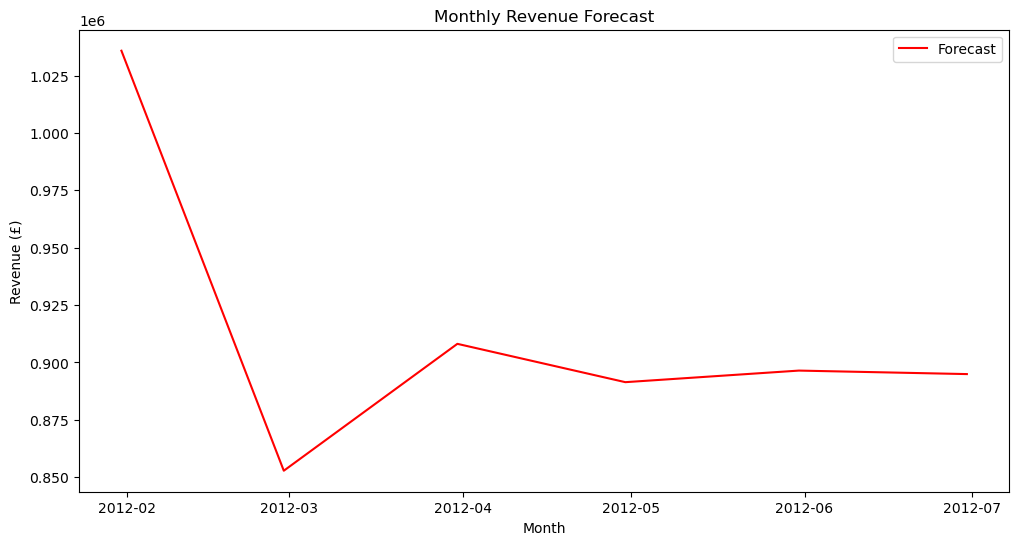

In [29]:
# Monthly Revenue Forecast
monthly_revenue = df1.set_index('InvoiceDate').resample('ME')['Revenue'].sum()

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(monthly_revenue, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

plt.figure(figsize=(12,6))
# plt.plot(monthly_revenue, label='Historical Revenue')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title("Monthly Revenue Forecast")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.legend()
plt.show()


 📌 **Observation:** Revenue experiences a decline at the beginning of the year, followed by a period of stabilization in the mid-year months.

## 4. Key Insights & Conclusion
- Revenue peaks in **November** (holiday effect), but dips in December.
- **UK is the primary market**, followed by a few European countries.
- **Top 20 customers contribute ~19%**, showing a broad customer base.
- A handful of products dominate revenue, while others sell high volumes at lower prices.

#### Exporting the data for further visual analysis

In [30]:
df1.to_excel( "online_retail_data_cleaned.xlsx", index=False)